   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


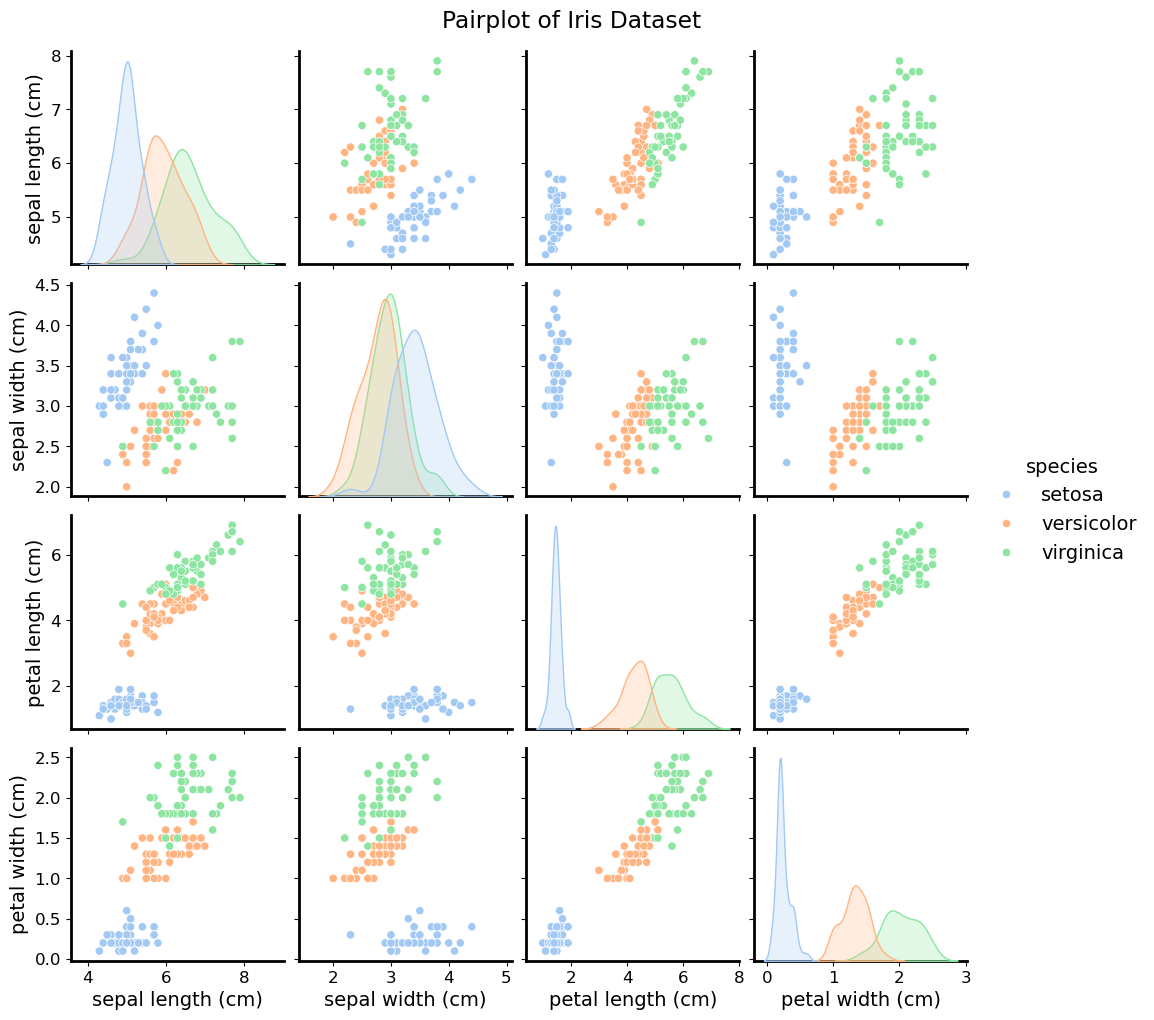

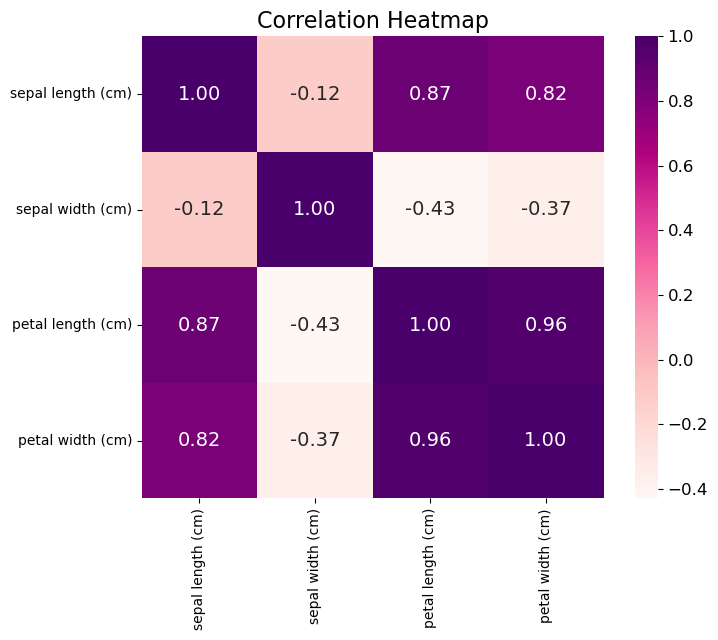

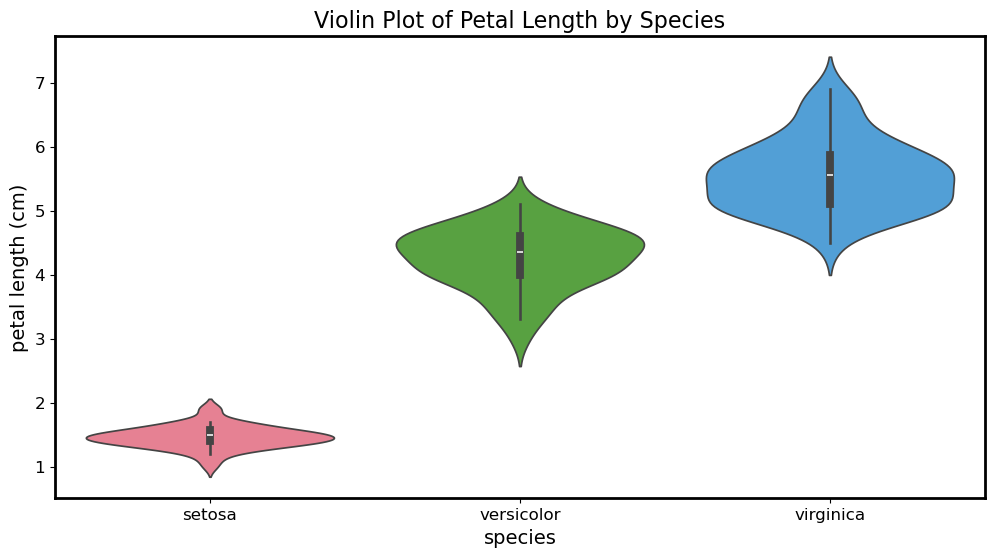

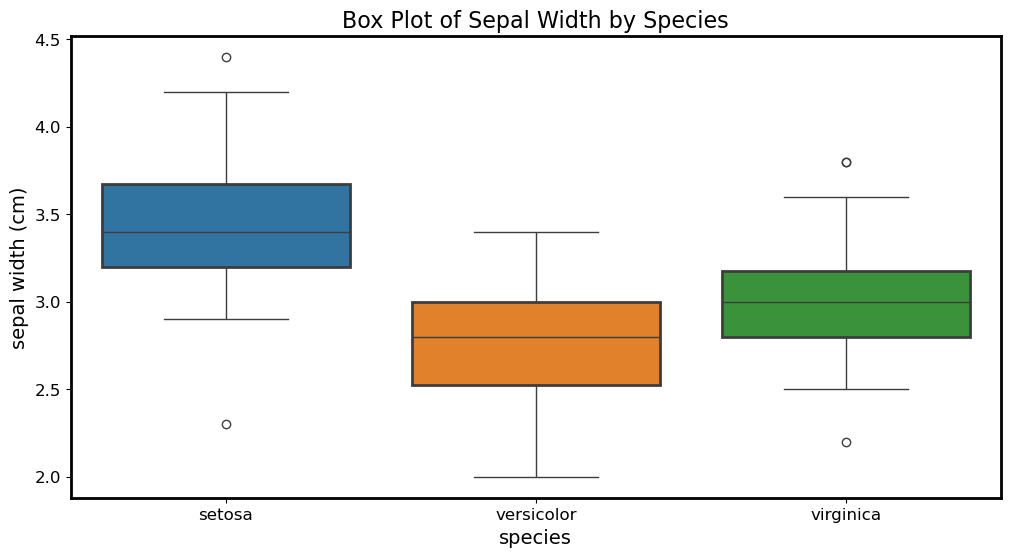

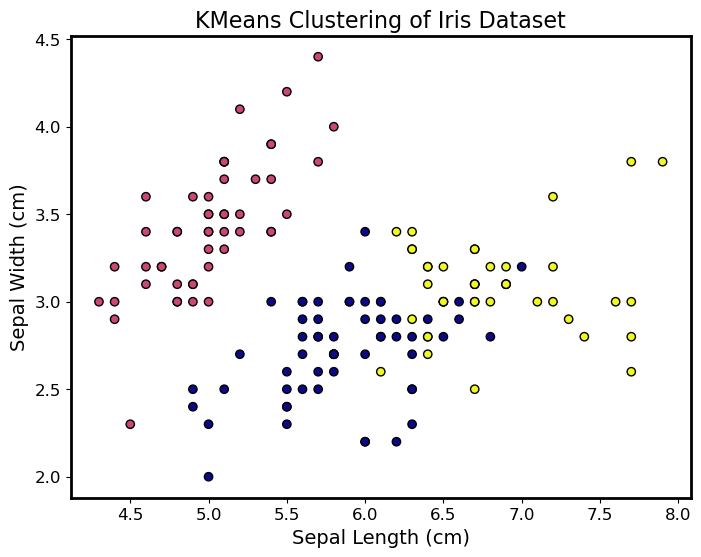

Silhouette Score for KMeans: 0.55


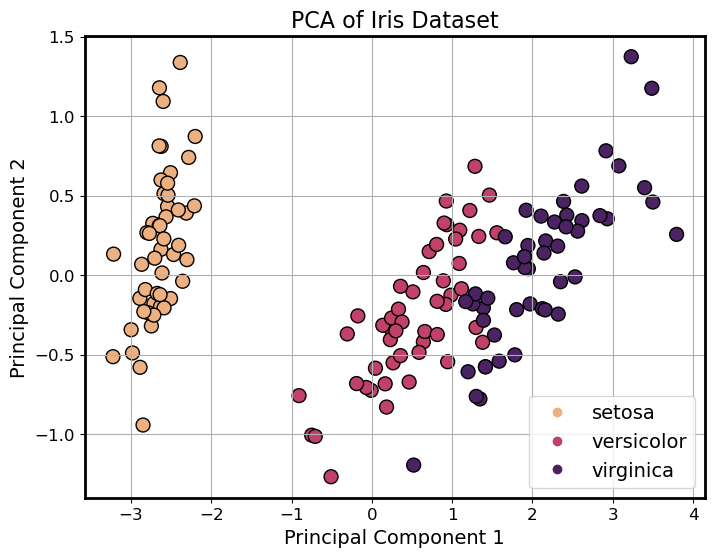

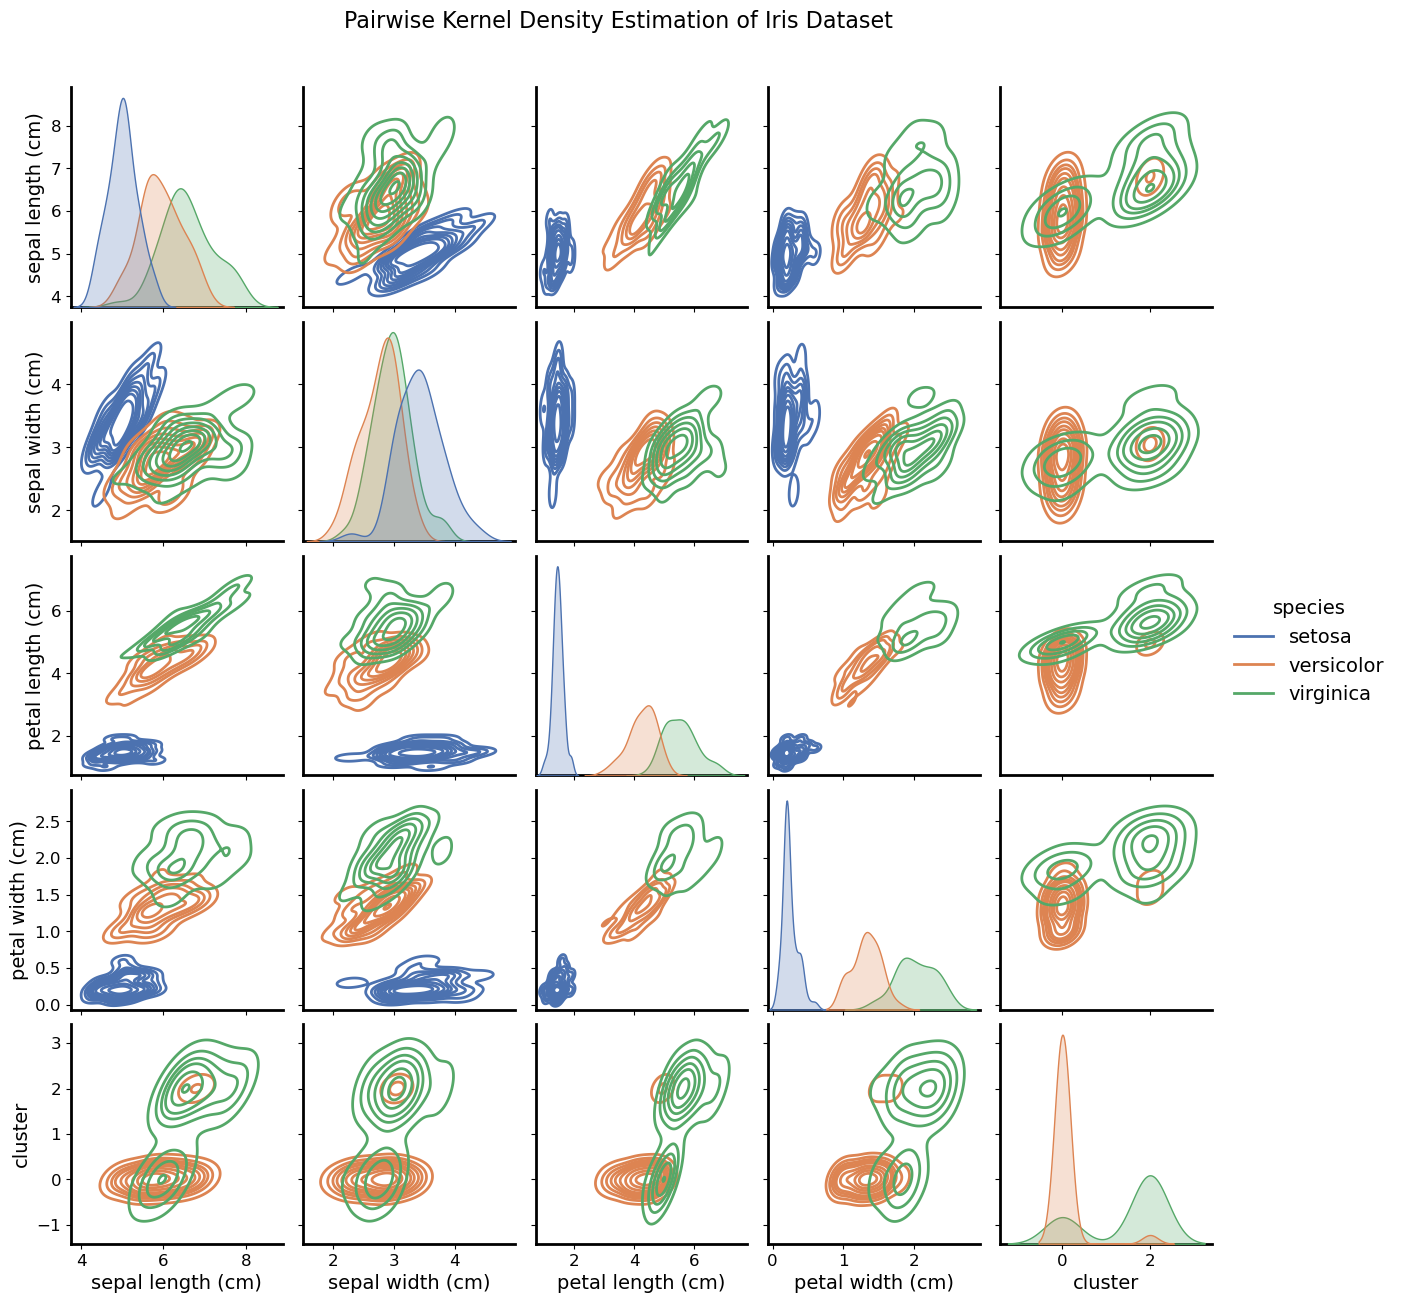

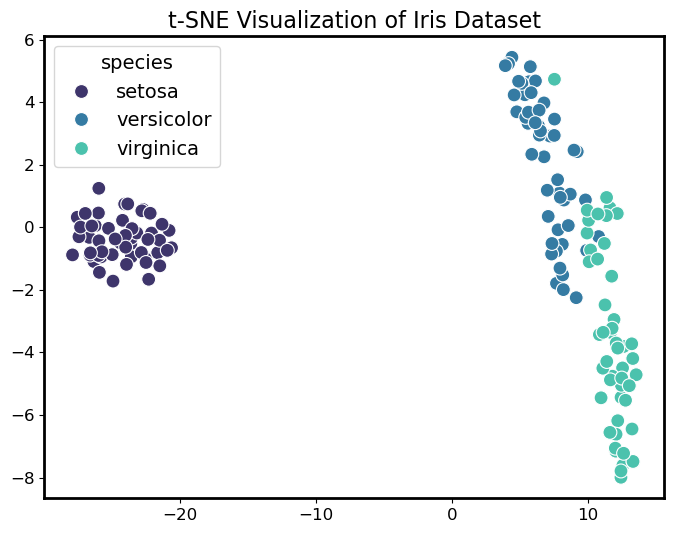

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.manifold import TSNE  
import numpy as np
import plotly.express as px

# Set global plot parameters 
plt.rcParams.update({
    'font.size': 14,   
    'axes.titlesize': 16,  
    'axes.labelsize': 14,   
    'xtick.labelsize': 12,   
    'ytick.labelsize': 12,   
    'lines.linewidth': 2,     
    'axes.linewidth': 2,      
})


iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target_names[y]


print(df.head())

# Data Exploration and Visualization

# Pairplot to visualize relationships
g = sns.pairplot(df, hue='species', palette='pastel')
g.fig.suptitle('Pairplot of Iris Dataset', y=1.02)  
plt.show()

# Correlation heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, fmt='.2f', cmap='RdPu', square=True)
plt.title('Correlation Heatmap')
plt.tick_params(axis='both', labelsize = 10)  
plt.show()

# Violin plot for species distribution
plt.figure(figsize=(12, 6))
sns.violinplot(x='species', y='petal length (cm)', data=df, hue='species', palette="husl")
plt.title('Violin Plot of Petal Length by Species')
plt.tick_params(axis='both', labelsize=12)  
plt.show()

# Box plot for sepal width with specified order
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='sepal width (cm)', data=df, order=['setosa', 'versicolor', 'virginica'], 
            hue='species', palette='tab10', boxprops=dict(linewidth=2))
plt.title('Box Plot of Sepal Width by Species')
plt.tick_params(axis='both', labelsize=12)  
plt.show()

# KMeans Clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['cluster'], cmap='plasma', edgecolor='k')
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.tick_params(axis='both', labelsize=12)  
plt.show()

# Evaluate Clustering
silhouette_avg = silhouette_score(X, df['cluster'])
print(f'Silhouette Score for KMeans: {silhouette_avg:.2f}')

# PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='flare', edgecolor='k', s=100)

# Create a custom legend for species
legend_labels = iris.target_names  
handles, _ = scatter.legend_elements()  
plt.legend(handles, legend_labels, loc='lower right')

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.tick_params(axis='both', labelsize=12)  
plt.show()


# Pairwise Kernel Density Estimation (KDE)
sns.pairplot(df, hue='species', kind='kde', palette='deep')
plt.title('Pairwise Kernel Density Estimation of Iris Dataset', loc='center', y=5.5, x=-1.8)
plt.tick_params(axis='both', labelsize=12)  
plt.show()

# Feature Engineering
df['sepal_length_width'] = df['sepal length (cm)'] * df['sepal width (cm)']
df['petal_length_width'] = df['petal length (cm)'] * df['petal width (cm)']

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['species'], palette='mako', s=100)
plt.title('t-SNE Visualization of Iris Dataset')
plt.tick_params(axis='both', labelsize=12)  
plt.show()

